# Life Expectancy and GDP

Here, I analyzed data from the World Health Organization and the World Bank to identify the relationship between GDP and life expectancy in six countries.

## Preparation

First, I imported **Pandas**, **pyplot**, and **seaborn**.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Then, I loaded the data into a dataframe named `all_data`.

In [95]:
all_data = pd.read_csv("all_data.csv")

Once the `all_data` was loaded, I looked at the names of each column.

In [96]:
all_data.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

The dataset contains four columns with the following information:
* Country
* Year
* Life expectancy at birth in years
* GDP

Along with those four columns, there are 96 rows. 

In [97]:
all_data.shape

(96, 4)

After that, I inspected data types. The 'Year' column is numerical, the while others are categorical.

In [98]:
all_data.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

Next, I searched for missing data and found that the dataset is complete.

In [99]:
all_data.isna().any().any()

False

Then, I inspected the first five lines of data.

In [100]:
all_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Cleaning Column Name

Compared to the others, the name of the third column (`Life expectancy at birth (years)`) is a bit long, so I used the *rename* function to change the column name to `Avg Lifetime`.

In [101]:
all_data = all_data.rename({"Life expectancy at birth (years)":"Avg Lifetime"}, axis = "columns")
all_data.head()

,Country,Year,Avg Lifetime,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Data Exploration

There are six countries in the dataset: Chile, China, Germany, Mexico, the United States of America, and Zimbabwe.

In [102]:
print(all_data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


To keep the information tidy, I used the *replace* function to change 'United States of America' to 'US'.

In [115]:
all_data = all_data.replace("United States of America","US")
print(all_data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'US' 'Zimbabwe']


The dataset is comprised of information collected from 2000 - 2015.

In [103]:
print(all_data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In addition to learning the `Life expectancy at birth (years)` by `Year`, `Country`, and `GDP`, I wanted to extrapolate the average `Life expectancy at birth (years)` and `GDP` by `Country` from 2000 - 2015.

In [117]:
all_data_Means = all_data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
all_data_Means = all_data_Means.rename({"GDP":"Avg GDP"}, axis = "columns")
all_data_Means

,Country,Avg Lifetime,Avg GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,US,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


### Bar Charts

The first bar chart shows the `Life expectancy at birth (years)` by `Country`.

Text(0.5, 0, 'Life expectancy at birth (years)')

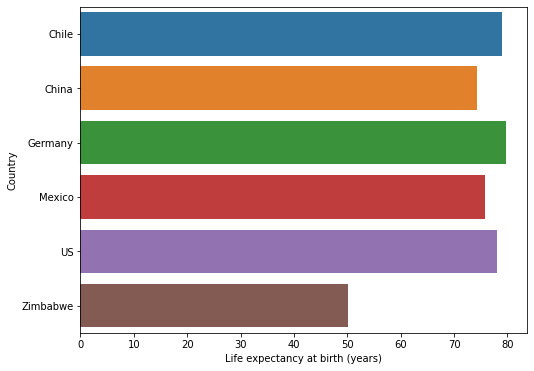

In [119]:
plt.figure(figsize=(8,6))
sns.barplot(x="Avg Lifetime", y="Country", data=all_data_Means)
plt.xlabel("Life expectancy at birth (years)")

Except for Zimbabwe, all of the countries have an approximate life expectancy of 77 years.

The second bar chart shows the `Avg GDP` by `Country`.

Text(0.5, 0, 'Average GDP in Trillions of US Dollars')

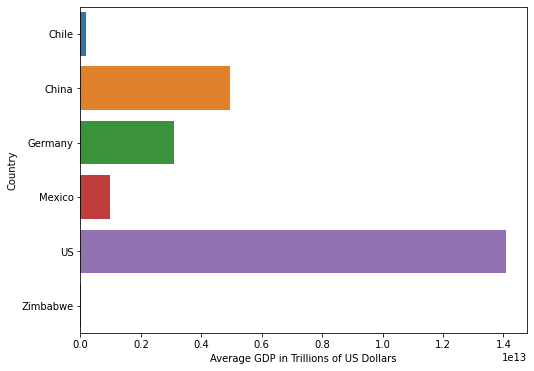

In [122]:
plt.figure(figsize=(8,6))
sns.barplot(x="Avg GDP", y="Country", data=all_data_Means)
plt.xlabel("Average GDP in Trillions of US Dollars")

The US has a *huge* GDP compared to the other countries. China, Germany and Mexico seem to be relatively even in comparison, while Zimbabwe does not even register.

### Violin Plots

In the first violin plot, China and the US have a relatively wide GDP range, whereas Zimbabwe, Chile, and Mexico have shorter ranges.

Text(0.5, 0, 'GDP in Trillions of US Dollars')

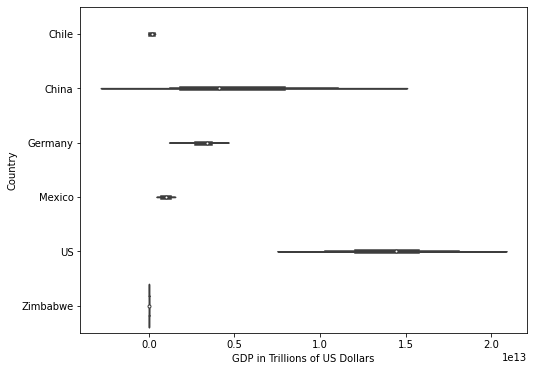

In [137]:
plt.figure(figsize=(8,6))
sns.violinplot(x="GDP", y="Country", data=all_data)
plt.xlabel("GDP in Trillions of US Dollars")

In the second violin plot, all of the countries have short life expectancy ranges except for Zimbabwe, which has a range from approximately 35 to 70.

Text(0.5, 0, 'Life expectancy at birth (years)')

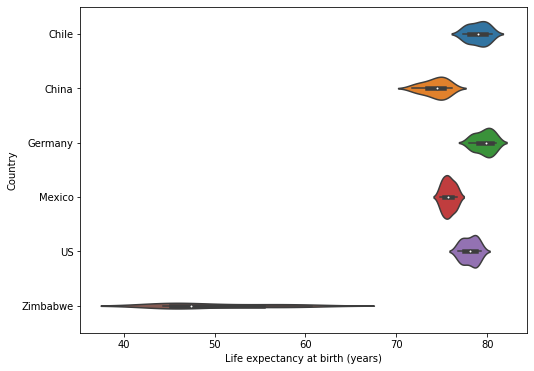

In [135]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Avg Lifetime", y="Country", data=all_data)
plt.xlabel("Life expectancy at birth (years)")

### Strip Plots

To define the data more effectively, I employed strip plots. First, a standalone strip plot is displayed.

Text(0.5, 0, 'Life expectancy at birth (years)')

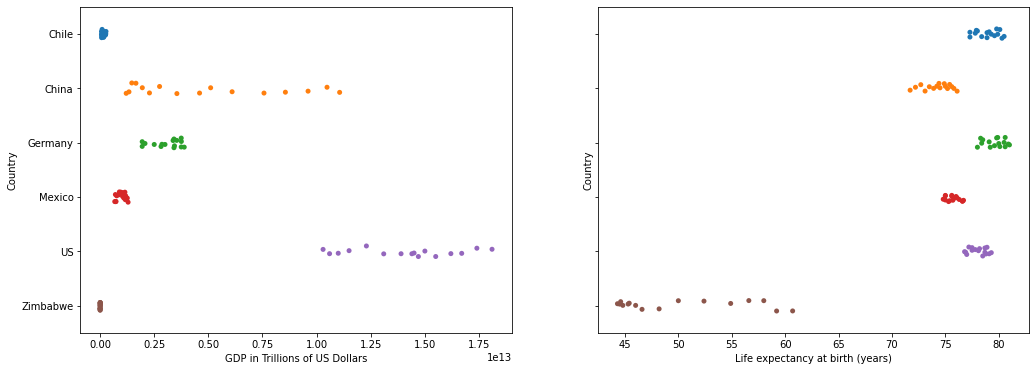

In [150]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(17, 6))
axes[0] = sns.stripplot(ax=axes[0], x="GDP", y="Country", data=all_data)
axes[0].set_xlabel("GDP in Trillions of US Dollars")
axes[1] = sns.stripplot(ax=axes[1], x="Avg Lifetime", y="Country", data=all_data)
axes[1].set_xlabel("Life expectancy at birth (years)")

Then, I overlaid strip plots on top of violin plots.

Text(0.5, 0, 'Life expectancy at birth (years)')

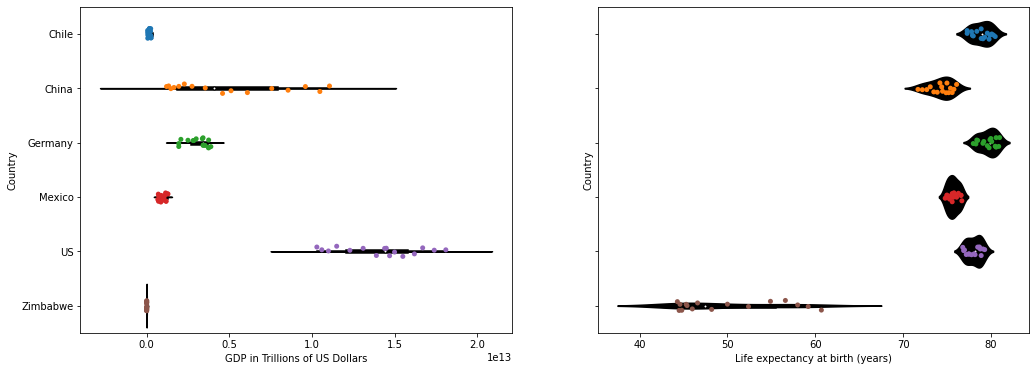

In [151]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(17, 6))
axes[0] = sns.violinplot(ax=axes[0], x="GDP", y="Country", data=all_data, color="black")
axes[0] = sns.stripplot(ax=axes[0], x="GDP", y="Country", data=all_data)
axes[0].set_xlabel("GDP in Trillions of US Dollars")
axes[1] = sns.violinplot(ax=axes[1], x="Avg Lifetime", y="Country", data=all_data, color="black")
axes[1] = sns.stripplot(ax=axes[1], x="Avg Lifetime", y="Country", data=all_data)
axes[1].set_xlabel("Life expectancy at birth (years)")

In the case of of the `GDP` plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values. This detail would not have been as clear in just a violin plot.

### Line Graphs

In the first line chart, one can see the US and China have experienced substantial financial gains from 2000 to 2015. China went from less than a quarter trillion dollars to one trillion over fifteen years. The remaining countries did not see similar increases. 

Text(0, 0.5, 'GDP in Trillions of US Dollars')

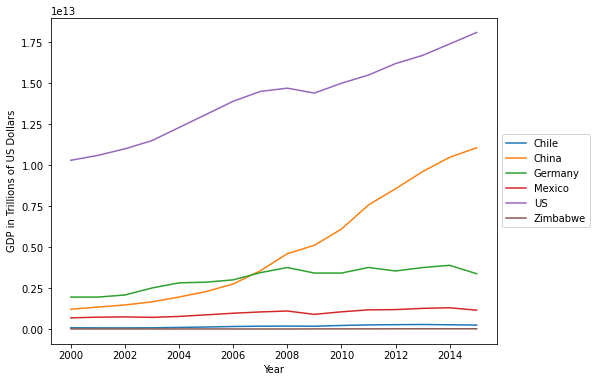

In [154]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Year", y="GDP", hue="Country", data=all_data)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of US Dollars")

When shown with individual line graphs, it is clear all of the countries experienced growth.

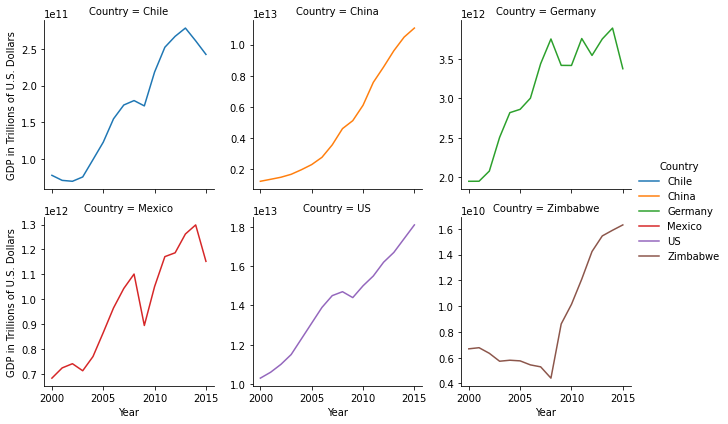

In [155]:
graphGDP = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP

Every country has seen an increase in life expectancy, but Zimbabwe has experienced the greatest increase after a bit of a dip around 2004.

Text(0, 0.5, 'Life expectancy at birth (years)')

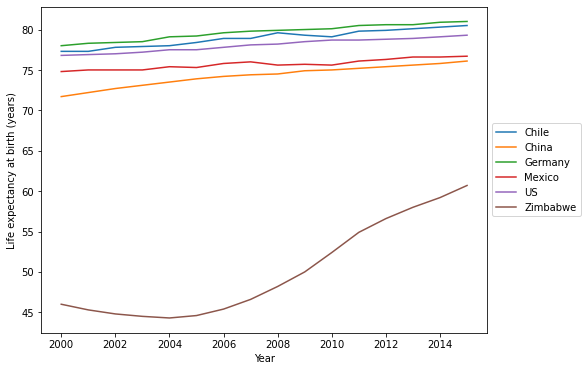

In [157]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Year", y="Avg Lifetime", hue="Country", data=all_data)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)")

Much like the break down of `GDP` by `Country` before, when shown with individual line graphs, it is clear all of the countries experienced a life expectancy increase. While the singular graphs show the increases were not as linear and smooth as first percieved, Chile and Mexico experienced dips around the same time.

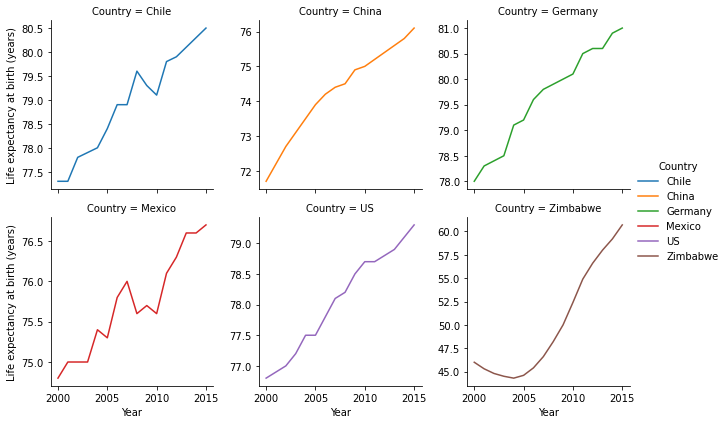

In [159]:
graphLife = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLife = (graphLife.map(sns.lineplot,"Year","Avg Lifetime")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLife